<a href="https://colab.research.google.com/github/venssss/TUGAS_MUHAMADAKBAR_221031003/blob/main/SVM_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print(dataset)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


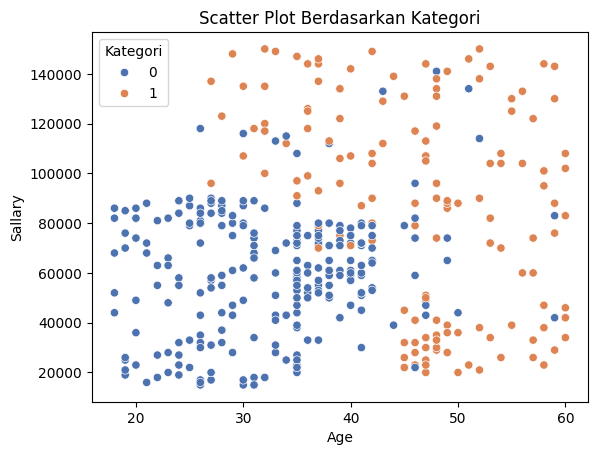

In [ ]:
# Membuat scatter plot dengan seaborn
sns.scatterplot(data=dataset, x='Age', y='EstimatedSalary', hue='Purchased', palette='deep')

plt.xlabel('Age')
plt.ylabel('Sallary')
plt.title('Scatter Plot Berdasarkan Kategori')
plt.legend(title='Kategori')
plt.show()

## Training the SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


## Making the Evaluation

**Confussion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[66  2]
 [ 8 24]]


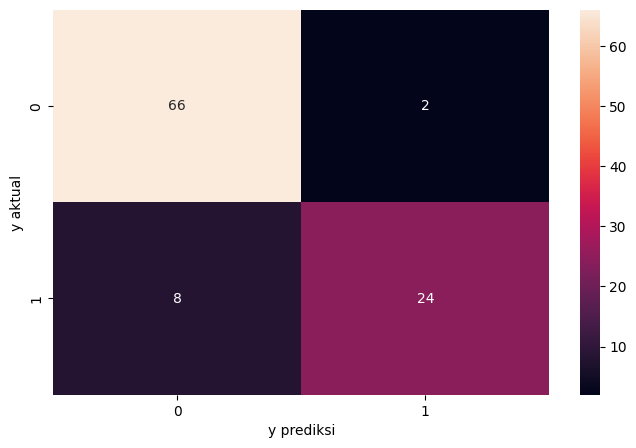

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

**Akurasi Model**

In [ ]:
print('Akurasi skore',accuracy_score(y_test, y_pred))

Akurasi skore 0.9


**Recall**

In [ ]:
recall = 24/(24+2)
print(recall)

0.9230769230769231


**Precission**

In [ ]:
precis = 24/(24+8)
print(precis)

0.75


**F1 Score**

In [ ]:
f1=2*(precis*recall)/(precis+recall)
print('f1',f1)

f1 0.8275862068965517


##Mengecek Overfitting dan Underfitting

**Underfitting**

*   Akurasi rendah pada prediksi data training
*   Akurasi rendah pada prediksi data testing


1. Prediksi Data Training

In [ ]:
y_pred_train = classifier.predict(X_train)
print(y_pred_train)

[0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0]


In [ ]:
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)

[[173  16]
 [ 37  74]]


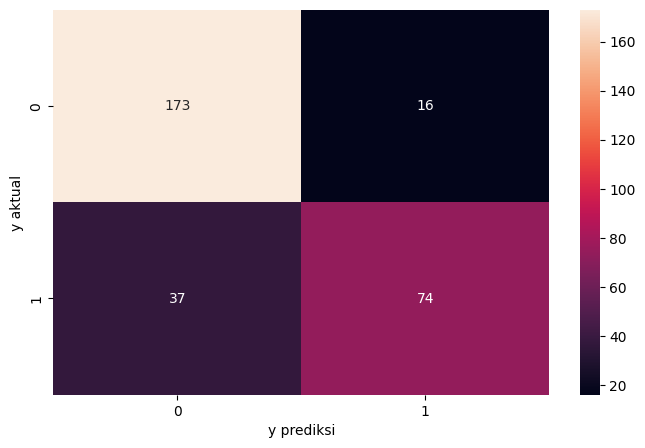

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_train, annot=True, fmt=".0f", ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [ ]:
print('Akurasi skore',accuracy_score(y_train, y_pred_train))

Akurasi skore 0.8233333333333334


2. Prediksi data testing

In [ ]:
y_pred_test = classifier.predict(X_test)
print(y_pred_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


In [ ]:
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

[[66  2]
 [ 8 24]]


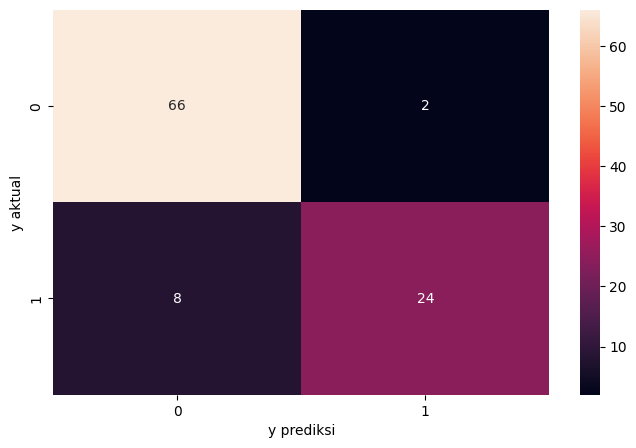

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_test, annot=True, fmt=".0f", ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [ ]:
print('Akurasi skore',accuracy_score(y_test, y_pred_test))

Akurasi skore 0.9


Akurasinya sebesar 0.86 > 0.70 artinya akurasinya model nya baik.

In [ ]:
print('Akurasi data training',accuracy_score(y_train, y_pred_train))
print('Akurasi data testing',accuracy_score(y_test, y_pred_test))

Akurasi data training 0.8233333333333334
Akurasi data testing 0.9
